## Install Libraries

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

### Using kaggle API token so you dont have to download the dataset locally
1. Click on your profile icon (top-right)
2. Go to “Account”
3. Scroll down to “API” section
4. Click “Create New API Token” (This will download a file named: kaggle.json)
5. Upload the kaggle.json file to Google Collab

In [3]:
# move the .json file to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install -q kaggle

In [5]:
# Downloading the dataset
!kaggle datasets download -d fareselmenshawii/license-plate-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/license-plate-dataset
License(s): CC0-1.0
100% 1.54G/1.54G [00:13<00:00, 134MB/s]
100% 1.54G/1.54G [00:13<00:00, 127MB/s]


In [6]:
# Unziping the dataset if its compressed
!unzip license-plate-dataset.zip -d license_plate_data

Streaming output truncated to the last 5000 lines.
  inflating: license_plate_data/labels/train/098c0f465fc70592.txt  
  inflating: license_plate_data/labels/train/0990a3baea002b33.txt  
  inflating: license_plate_data/labels/train/09bc619b667f872b.txt  
  inflating: license_plate_data/labels/train/09da5354c9be1587.txt  
  inflating: license_plate_data/labels/train/09ef781090e9f311.txt  
  inflating: license_plate_data/labels/train/0a14d074d1428df1.txt  
  inflating: license_plate_data/labels/train/0a18fb90f897e55e.txt  
  inflating: license_plate_data/labels/train/0a1f6e950e269fdd.txt  
  inflating: license_plate_data/labels/train/0a2f7b3087967dd6.txt  
  inflating: license_plate_data/labels/train/0a314340d4d2873f.txt  
  inflating: license_plate_data/labels/train/0a623bc78056163d.txt  
  inflating: license_plate_data/labels/train/0a699c9b1dafc8e0.txt  
  inflating: license_plate_data/labels/train/0a6ef05cd485f144.txt  
  inflating: license_plate_data/labels/train/0a77fa2843b2f661.txt

## Import Libraries

In [9]:
from google.colab import drive, files
from ultralytics import YOLO
from IPython.display import Image, display
import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
# Mount your drive so its easy to save files
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset structure should be:</br>
dataset/</br>
├── images/</br>
│   ├── train/</br>
│   └── val/</br>
├── labels/</br>
│   ├── train/</br>
│   └── val/</br>


In [ ]:
# Checking the structure
!ls /content/license_plate_data

images	labels


In [8]:
# Making the metadata for training
data_yaml = f"""
path: /content/license_plate_data
train: images/train
val: images/val

nc: 1
names: ['number_plate']
"""

with open('/content/license_plate_data/data.yaml', 'w') as f:
    f.write(data_yaml)

## Train the YOLO Object Detection Model

In [11]:
model = YOLO('yolov8m.pt')  # You can also use yolov8s.pt, yolov8m.pt, etc.

model.train(data='/content/license_plate_data/data.yaml',
            epochs=30,
            imgsz=320,
            batch=16,
            project="runs/train",
            name="number_plate_detection"
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/license_plate_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=number_plate_detection2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776275  ultralytics.nn.modules.head.Detect           [1, [192, 384, 576]]          
Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mi

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2375.9±1288.2 MB/s, size: 232.8 KB)


train: Scanning /content/license_plate_data/labels/train... 4295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4295/4295 [00:01<00:00, 2384.61it/s]


train: New cache created: /content/license_plate_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1437.7±1093.1 MB/s, size: 399.9 KB)


val: Scanning /content/license_plate_data/labels/val... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<00:00, 1422.20it/s]


val: New cache created: /content/license_plate_data/labels/val.cache
Plotting labels to runs/train/number_plate_detection2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/train/number_plate_detection2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.98G      1.723      1.564      1.228         26        320: 100%|██████████| 269/269 [01:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.08it/s]


                   all       1073       1573    0.00215      0.192    0.00108   0.000348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.54G       1.87      1.497      1.287         12        320: 100%|██████████| 269/269 [00:59<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.09it/s]


                   all       1073       1573      0.533      0.413       0.37      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.61G      1.828      1.441      1.272         12        320: 100%|██████████| 269/269 [00:58<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]

                   all       1073       1573      0.526      0.428      0.378      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.68G      1.771      1.346      1.215         18        320: 100%|██████████| 269/269 [00:59<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.44it/s]

                   all       1073       1573       0.68      0.445      0.486      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.74G      1.728      1.251      1.207         22        320: 100%|██████████| 269/269 [00:59<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]

                   all       1073       1573      0.694      0.483      0.518      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.81G      1.686      1.225      1.181         19        320: 100%|██████████| 269/269 [01:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]

                   all       1073       1573      0.722      0.529      0.555      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.88G      1.627      1.133      1.162          8        320: 100%|██████████| 269/269 [00:59<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]

                   all       1073       1573      0.724      0.549      0.572      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.05G      1.623      1.107      1.152         18        320: 100%|██████████| 269/269 [00:59<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]


                   all       1073       1573      0.793      0.577      0.623      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.34G      1.581      1.067      1.146          9        320: 100%|██████████| 269/269 [00:59<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.59it/s]


                   all       1073       1573      0.739      0.546      0.595      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.41G      1.572      1.039      1.134         40        320: 100%|██████████| 269/269 [00:59<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.57it/s]

                   all       1073       1573      0.776      0.579      0.624      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.48G      1.527     0.9943      1.118          9        320: 100%|██████████| 269/269 [00:58<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]

                   all       1073       1573      0.802      0.574      0.638      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.65G      1.504     0.9709      1.107         15        320: 100%|██████████| 269/269 [00:58<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.25it/s]

                   all       1073       1573      0.796      0.607       0.67      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.86G      1.479     0.9546      1.102         12        320: 100%|██████████| 269/269 [01:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]

                   all       1073       1573      0.697      0.592       0.62      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.92G      1.478     0.9496        1.1         14        320: 100%|██████████| 269/269 [00:59<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]

                   all       1073       1573      0.821      0.615      0.674       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.07G      1.454     0.9426      1.088         23        320: 100%|██████████| 269/269 [00:58<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       1073       1573      0.806       0.61      0.673      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.21G      1.426     0.9011      1.081         19        320: 100%|██████████| 269/269 [00:58<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]

                   all       1073       1573       0.82      0.643      0.688      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.39G      1.423     0.8712      1.075         14        320: 100%|██████████| 269/269 [00:59<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]

                   all       1073       1573      0.821      0.618      0.671       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.51G      1.402     0.8725       1.07         22        320: 100%|██████████| 269/269 [00:58<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]

                   all       1073       1573      0.817      0.637      0.694      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.66G      1.401      0.849       1.07         15        320: 100%|██████████| 269/269 [00:58<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       1073       1573      0.787      0.641      0.689      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.86G      1.378     0.8223      1.058         19        320: 100%|██████████| 269/269 [00:59<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]

                   all       1073       1573      0.788      0.633      0.684      0.363


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.96G      1.403     0.8018      1.066          8        320: 100%|██████████| 269/269 [00:58<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.29it/s]

                   all       1073       1573      0.817      0.645      0.707      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.13G      1.386     0.7796      1.057          7        320: 100%|██████████| 269/269 [00:57<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]


                   all       1073       1573      0.842      0.638        0.7      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.27G      1.351     0.7509      1.057          7        320: 100%|██████████| 269/269 [00:57<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.53it/s]

                   all       1073       1573      0.837      0.655      0.716      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.45G       1.36     0.7348      1.054         10        320: 100%|██████████| 269/269 [00:58<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]

                   all       1073       1573      0.824      0.651      0.716      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.62G      1.358     0.7271      1.046         11        320: 100%|██████████| 269/269 [00:57<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]

                   all       1073       1573      0.841      0.659      0.724      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.71G      1.305     0.6959      1.023         13        320: 100%|██████████| 269/269 [00:57<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.12it/s]

                   all       1073       1573      0.861      0.662      0.737      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.85G       1.29     0.6879      1.031         13        320: 100%|██████████| 269/269 [00:57<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.03it/s]

                   all       1073       1573      0.838      0.671      0.742      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.16G      1.281      0.686      1.031          7        320: 100%|██████████| 269/269 [00:57<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]

                   all       1073       1573      0.842       0.67       0.74      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.23G      1.282     0.6837      1.021          8        320: 100%|██████████| 269/269 [00:57<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.57it/s]


                   all       1073       1573      0.857      0.664      0.743        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.31G      1.242     0.6488      1.009         14        320: 100%|██████████| 269/269 [00:57<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]

                   all       1073       1573      0.846      0.681      0.749      0.404



30 epochs completed in 0.579 hours.
Optimizer stripped from runs/train/number_plate_detection2/weights/last.pt, 52.0MB
Optimizer stripped from runs/train/number_plate_detection2/weights/best.pt, 52.0MB

Validating runs/train/number_plate_detection2/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.84it/s]


                   all       1073       1573      0.847      0.682       0.75      0.405
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/train/number_plate_detection2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1e360d7f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

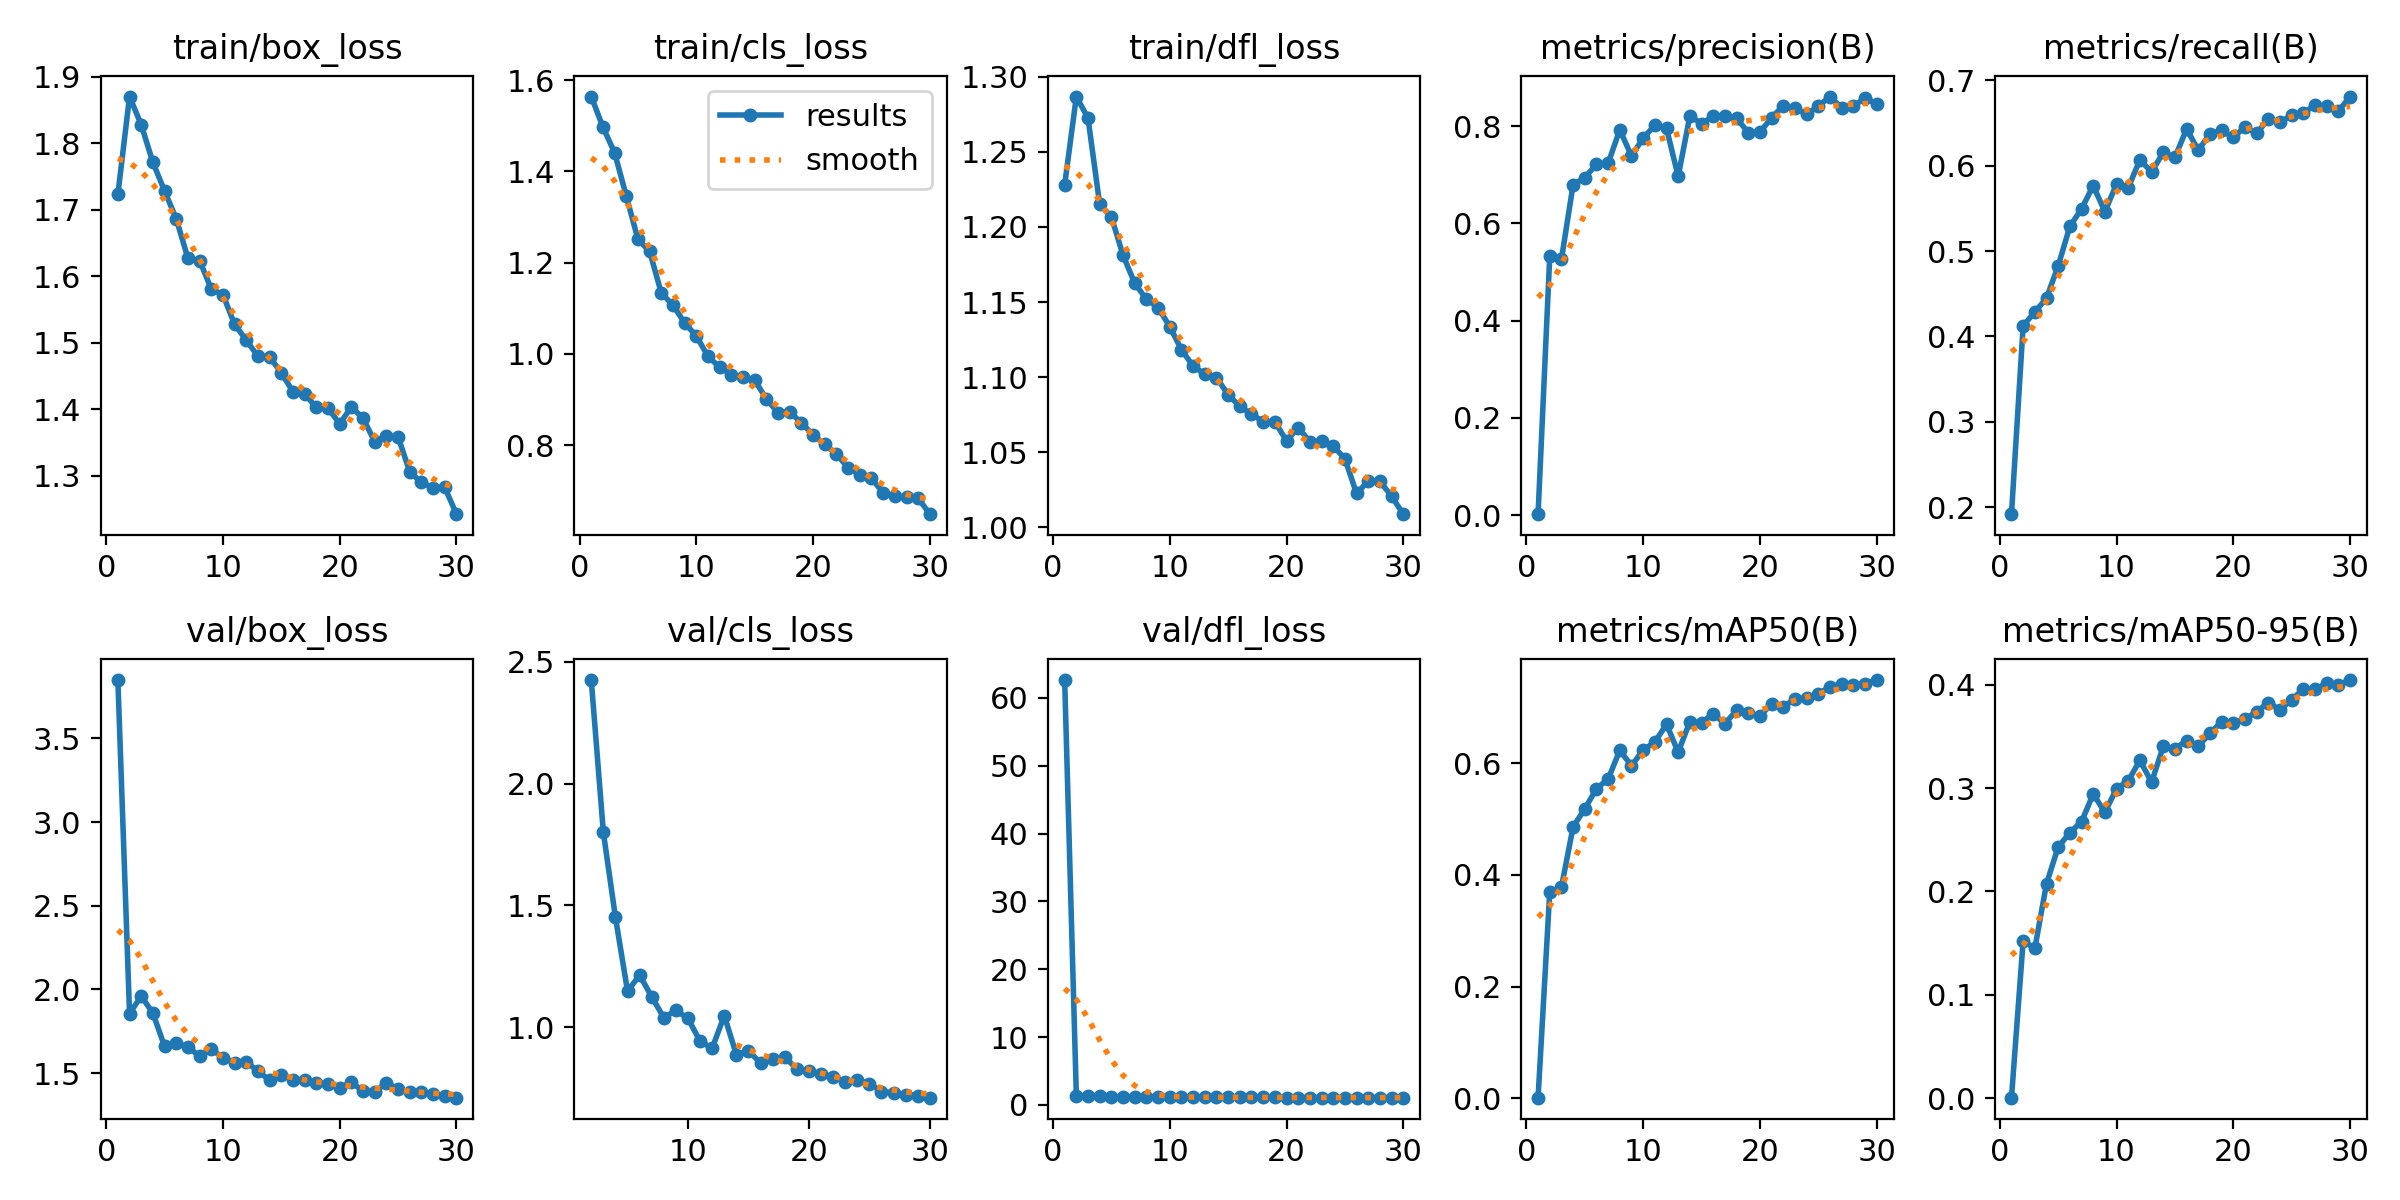

In [13]:
# Show training results image (losses, precision, recall, mAP curves)
display(Image(filename='runs/train/number_plate_detection2/results.png'))

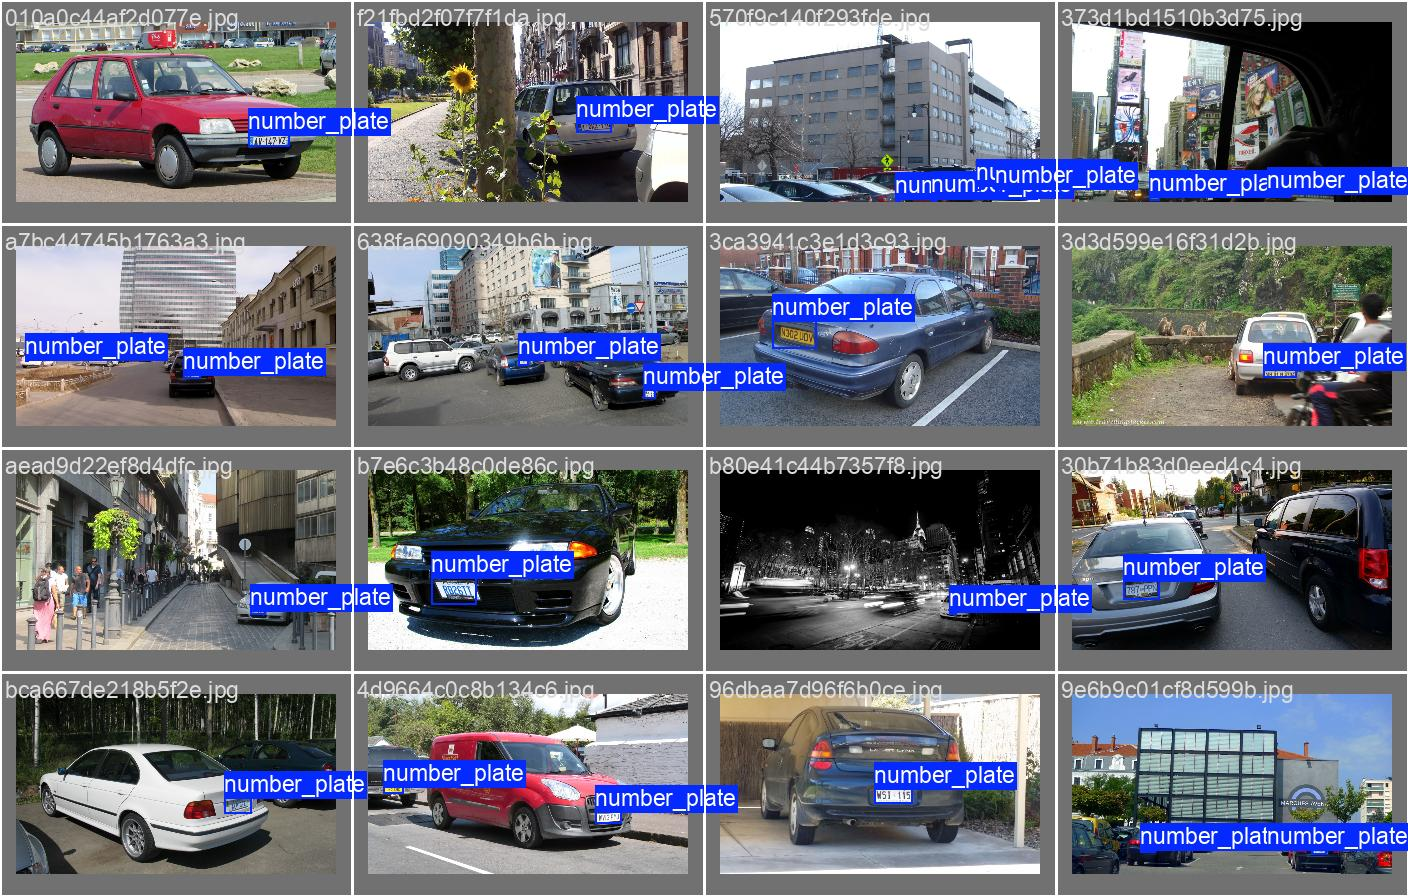

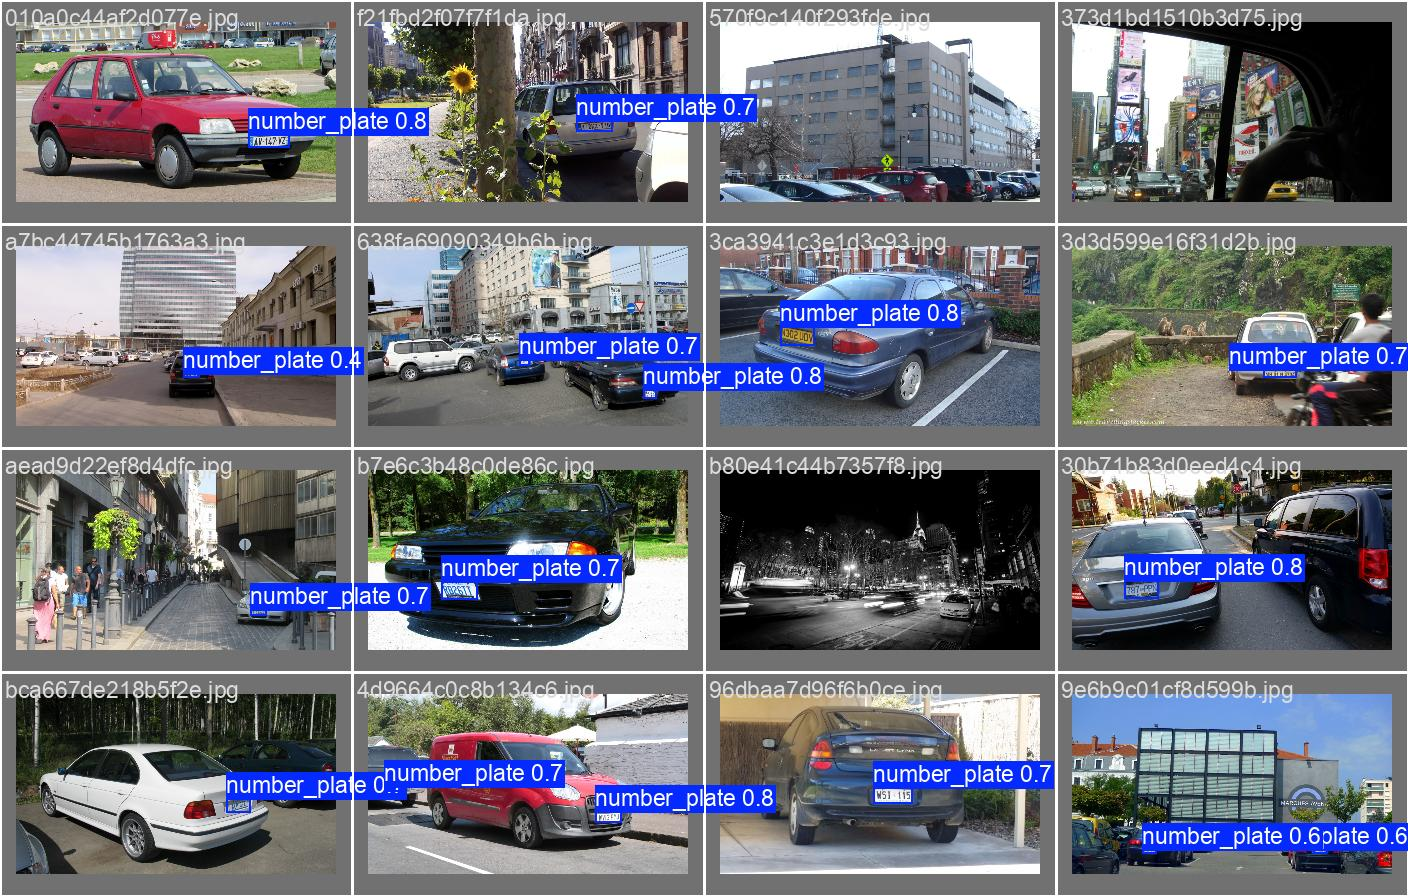

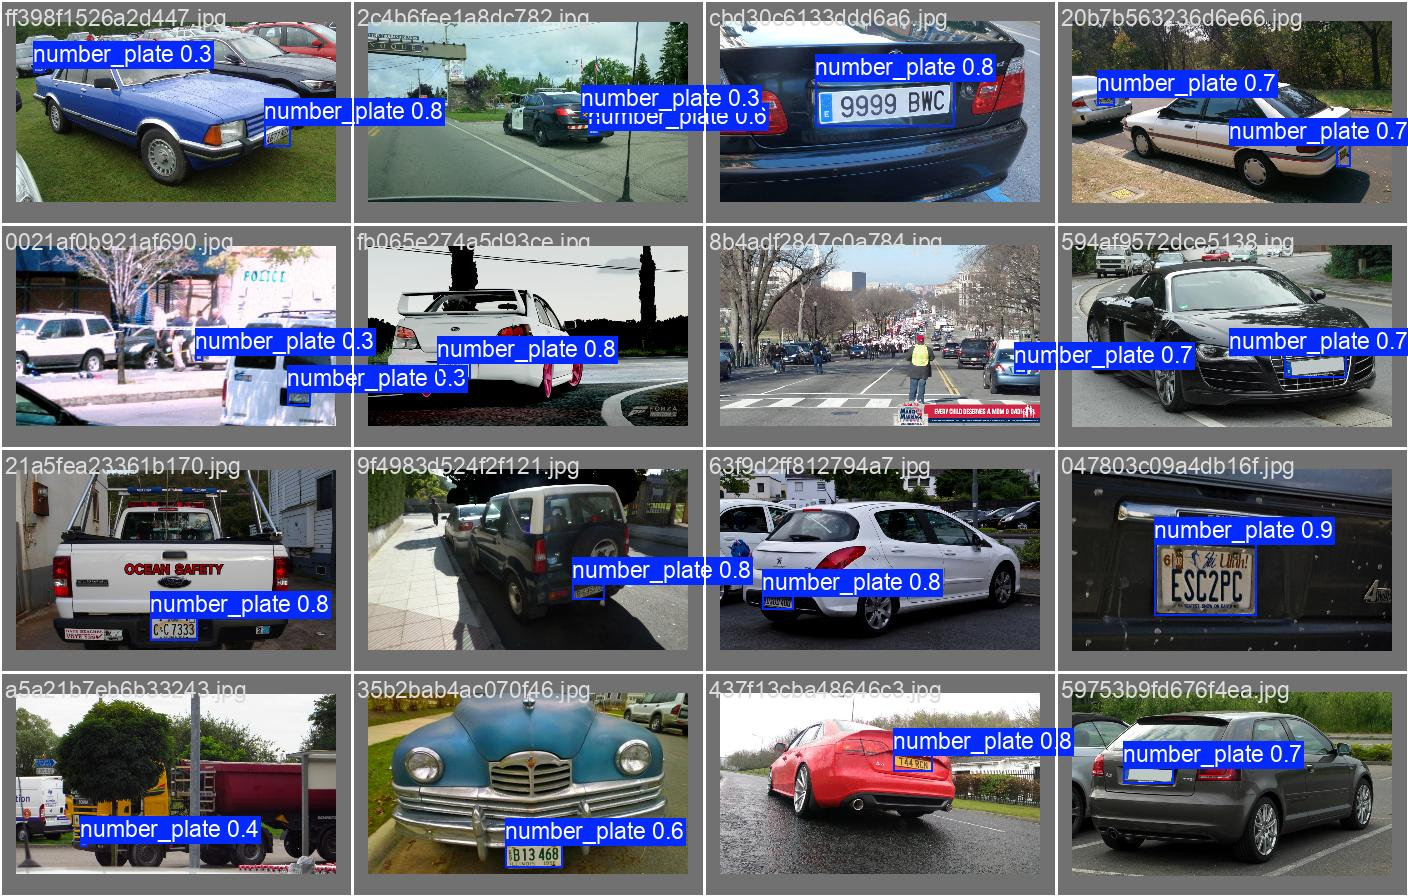

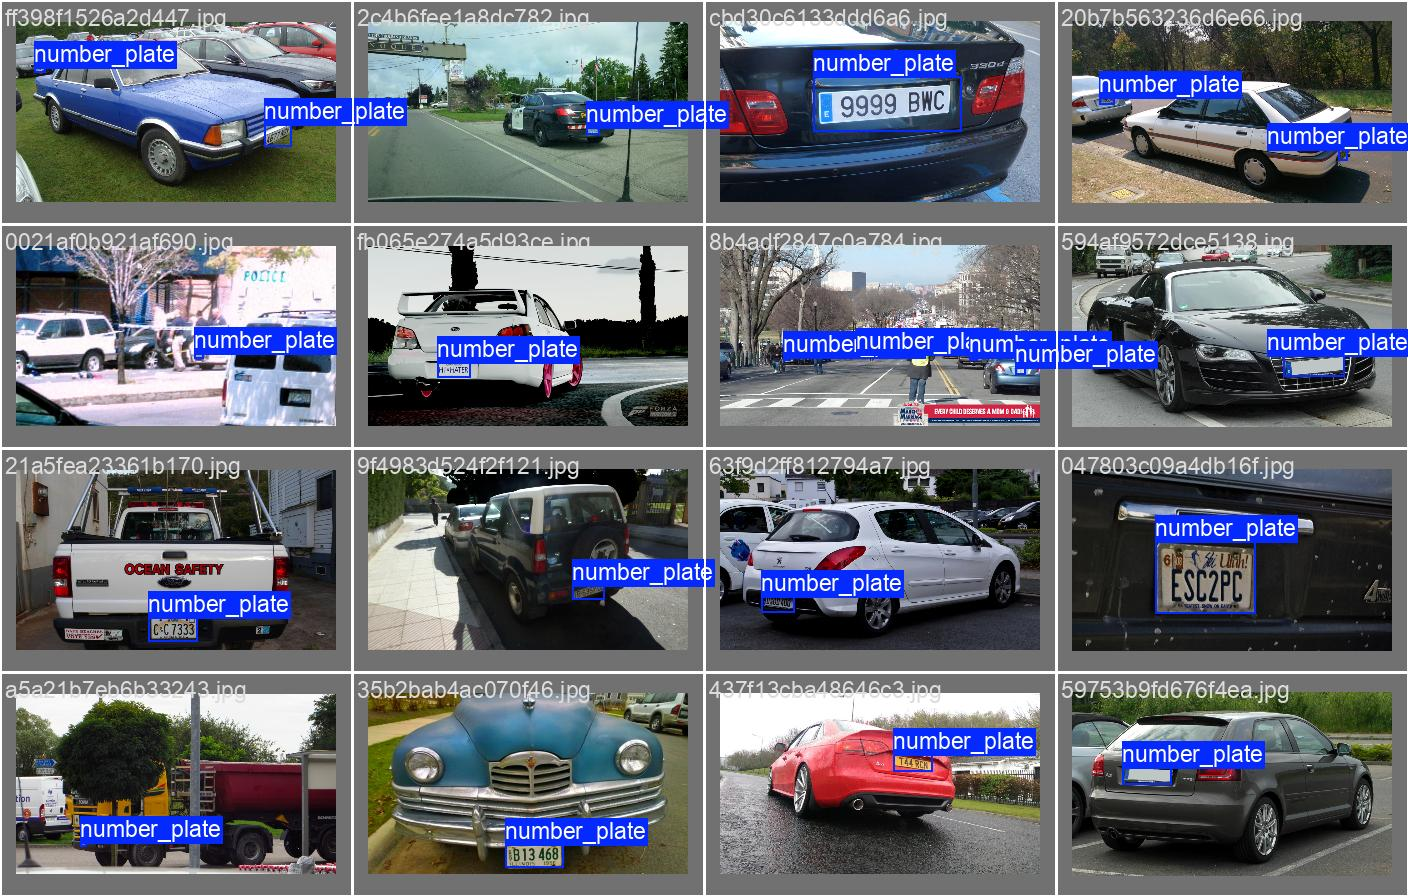

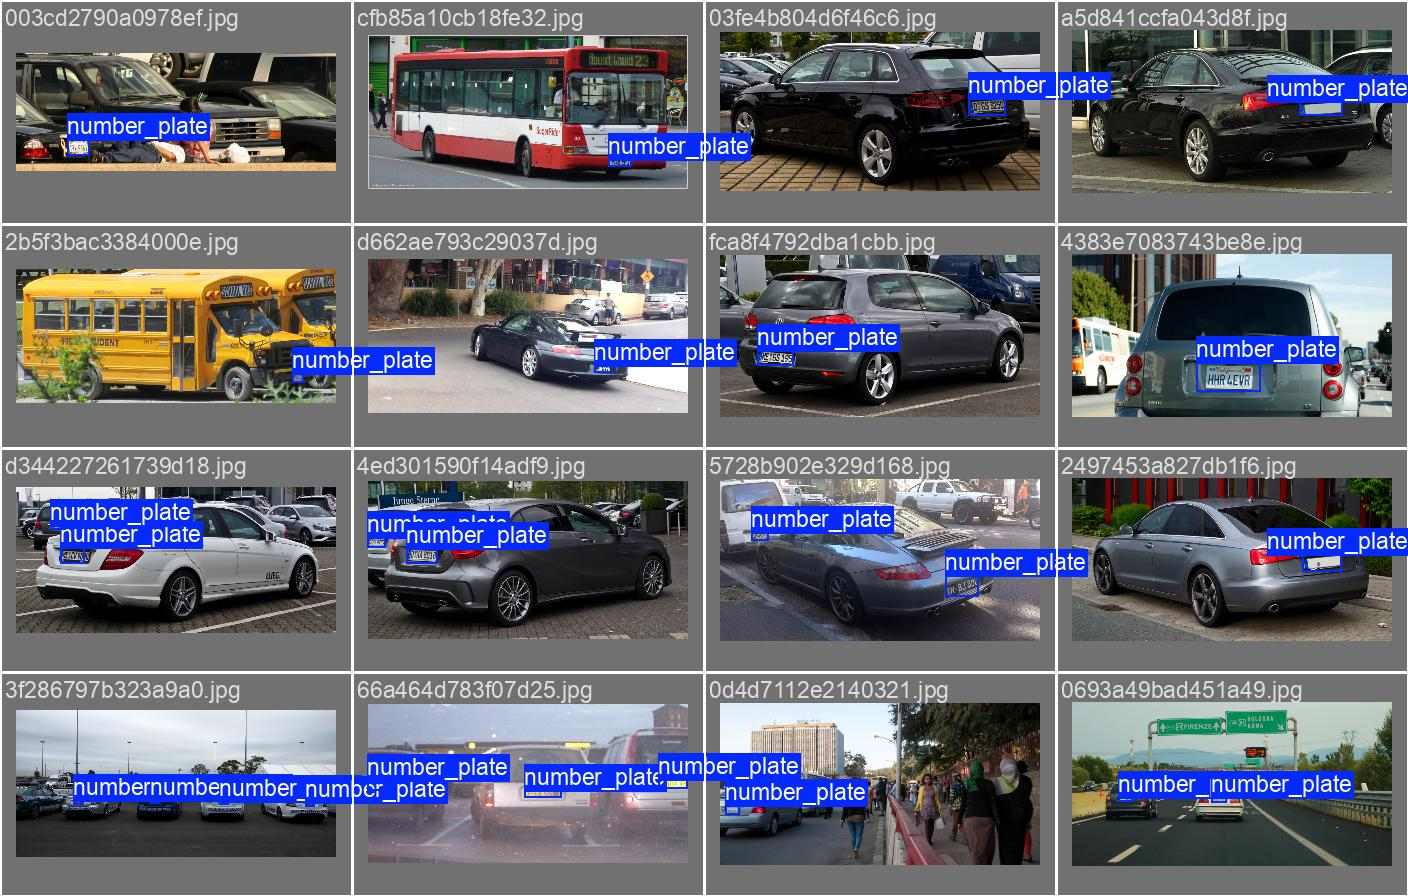

In [14]:
# Show a few example predictions
prediction_images = glob.glob('runs/train/number_plate_detection2/val_batch*.jpg')

for img_path in prediction_images[:5]:
    display(Image(filename=img_path))

In [ ]:
# Saving the model
files.download('runs/train/number_plate_detection2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>